<a href="https://colab.research.google.com/github/Ankurdewangan12/Dog-Cat_Classification/blob/main/Dog%26_Cat_image_recorgnization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: !mkdir -p ~/.kaggle

!mkdir -p ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:13<00:00, 194MB/s]
100% 1.06G/1.06G [00:13<00:00, 83.4MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten ,BatchNormalization,Dropout

In [ ]:
# Generators it divide the data into batches (used tot process large amount of data)
train_DS=keras.utils.image_dataset_from_directory (

    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
validation_DS=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize : to get the output of image in 0/1 form
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_DS=train_DS.map(process)
validation_DS=validation_DS.map(process)

In [ ]:
# Creating CNN model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_DS,epochs=10,validation_data=validation_DS)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 83ms/step - accuracy: 0.5731 - loss: 2.2764 - val_accuracy: 0.5318 - val_loss: 0.8094
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6003 - loss: 0.6584 - val_accuracy: 0.6386 - val_loss: 0.6624
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.6627 - loss: 0.6212 - val_accuracy: 0.6580 - val_loss: 0.5781
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.7250 - loss: 0.5320 - val_accuracy: 0.6518 - val_loss: 0.7391
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.7568 - loss: 0.4743 - val_accuracy: 0.6572 - val_loss: 0.9790
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.7852 - loss: 0.4267 - val_accuracy: 0.7000 - val_loss: 0.5622
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - accuracy: 0.8047 - loss: 0.3795 - val_accuracy: 0.7876 - val_loss: 0.4521
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.8262 - loss: 0.3271 - 

In [ ]:
import matplotlib.pyplot as plt


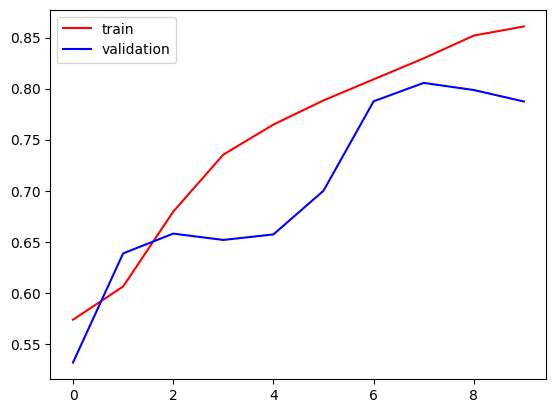

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

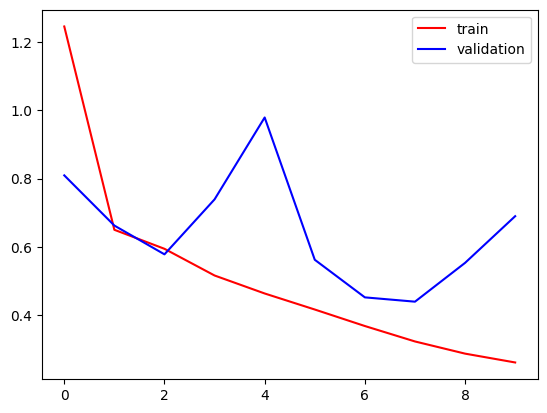

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

## Above plot shows that their is the huge gap which is the clear indication of **overfitting**


---
**After applying BatchNormalization and Dropout the graph of test and valiadition of loss and accuracy are nearly to reach other**



**To reduce the over fitting there are many ways : **

In [ ]:
# Add more data - we already use our fully data
# Data Augmentation - In which we create new data form existing data
# L1/L2 Regularizer
# Drop out
# batch normilazition
# Reduce complexity of model

#in this we use Dropout and batch normilazition method

# Now Start the prediction on the new unseen data

In [ ]:
# upload new cat and dog .jpg image for prediction


In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/dog.jpeg')

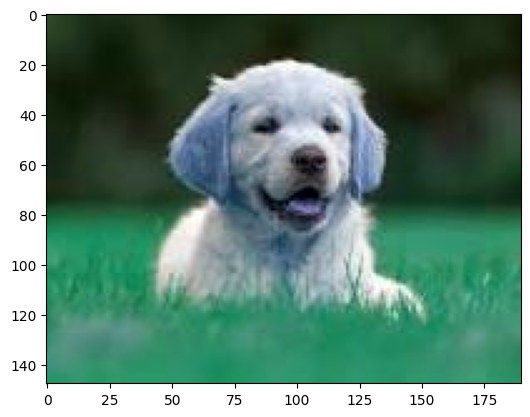

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(148, 190, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[1.]], dtype=float32)

**1 shows that the image is of dog and 0 show that the image is of **cat** **

In [ ]:
test_img2=cv2.imread('/content/cat.jpeg')

In [ ]:
test_img2.shape

(148, 216, 3)

In [ ]:
test_img2 = cv2.resize(test_img2,(256,256))

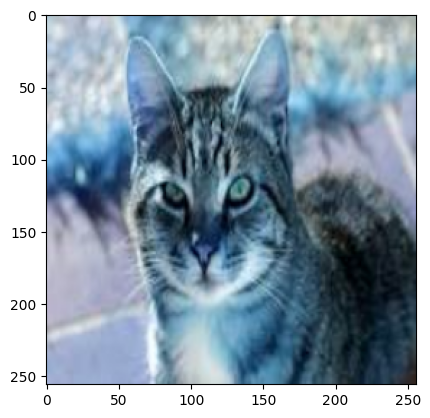

In [ ]:
plt.imshow(test_img2)

In [ ]:
test_input=test_img2.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.530885]], dtype=float32)